<a href="https://colab.research.google.com/github/hayaboy/ds/blob/master/%EC%88%98%EC%B9%98%EC%98%88%EC%B8%A1%EB%AA%A9%EC%A0%81%EC%9D%84_%EC%9C%84%ED%95%9C_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EB%AA%A8%EB%8D%B8_%EC%9D%91%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression

In [2]:
# %matplotlib inline

#### 1.1. Read in data and visualize: 

In [6]:
pd.read_csv('./sample_data/data_galton.csv')

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0
...,...,...
923,73.7,69.5
924,73.7,69.5
925,73.7,69.5
926,73.7,69.5


In [8]:
df=pd.read_csv('./sample_data/data_galton.csv')

In [15]:
df.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [16]:
pd.crosstab(df.parent,df.child)

child,61.7,62.2,63.2,64.2,65.2,66.2,67.2,68.2,69.2,70.2,71.2,72.2,73.2,73.7
parent,,,,,,,,,,,,,,
64.0,1,0,2,4,1,2,2,1,1,0,0,0,0,0
64.5,1,1,4,4,1,5,5,0,2,0,0,0,0,0
65.5,1,0,9,5,7,11,11,7,7,5,2,1,0,0
66.5,0,3,3,5,2,17,17,14,13,4,0,0,0,0
67.5,0,3,5,14,15,36,38,28,38,19,11,4,0,0
68.5,1,0,7,11,16,25,31,34,48,21,18,4,3,0
69.5,0,0,1,16,4,17,27,20,33,25,20,11,4,5
70.5,1,0,1,0,1,1,3,12,18,14,7,4,3,3
71.5,0,0,0,0,1,3,4,3,5,10,4,9,2,2


In [17]:
myTable=pd.crosstab(df.parent,df.child)

In [18]:
nrows=myTable.shape[0]
ncols=myTable.shape[1]

In [19]:
childHeights=list(myTable.columns)
parentHeights=list(myTable.index)

In [20]:
combo = [ (x,y,myTable.loc[x,y]) for x in parentHeights for y in childHeights]
combo = pd.DataFrame(combo, columns = ['x','y','freq'])

In [21]:
combo

,x,y,freq
0,64.0,61.7,1
1,64.0,62.2,0
2,64.0,63.2,2
3,64.0,64.2,4
4,64.0,65.2,1
...,...,...,...
149,73.0,70.2,0
150,73.0,71.2,0
151,73.0,72.2,1
152,73.0,73.2,3


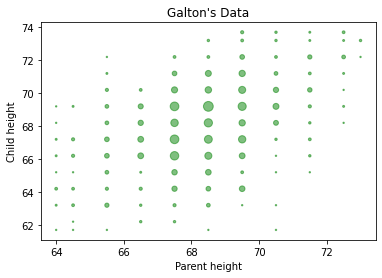

In [22]:
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='green',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Data")
plt.show()

#### 1.2. Linear regression training:

In [5]:
# help(LinearRegression)

In [3]:
# Instantiate a linear regression object.
lm = LinearRegression(fit_intercept=True)

In [9]:
# Train.
lm.fit(df[['parent']],df[['child']])

LinearRegression()

In [10]:
# Show the slope.
lm.coef_

array([[0.64629058]])

In [11]:
# Show the intercept.
lm.intercept_

array([23.94153018])

#### 1.3. Visualization of the regression line

In [12]:
# Predicted Y.
predY = lm.predict(df[['parent']])

In [14]:
# predY

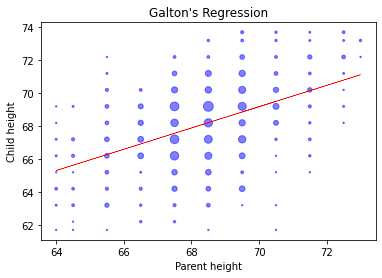

In [23]:
# Show the Scatter plot + Regression line.
plt.plot(df.parent.values,predY,c = 'red',linestyle='-',linewidth=0.5)
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='blue',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Regression")
plt.show()